<a href="https://colab.research.google.com/github/0tv0renakniga/dsc_207_week_7/blob/main/week7_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Discussion
For this week's disccsuission we will need to cover many topics. To ensure that we get enough time to discuss what is important, you are assigned a task. You will need to fill in the inferences and summuires of the EDA performed by me to ensure tha you are well versed with the data in advanced. There will be a comment that says **TODO** followed by what you are required to do in that space. Just add a text cell bellow every TODO cell and write your answer.
## Deadline 20th February, 5:00 PM (PST) [No late submssion allowed]



## **Dataset Overview(AI generated)**

**Source**: UCI Machine Learning Repository
**Samples**: 1,372 banknote images (762 authentic, 610 fake)
**Features**: 4 numerical predictors from wavelet transforms
**Target**: Binary class (0=authentic, 1=fake)

---

## **Feature Deep Dive**

### 1. **Variance of Wavelet Transformed Image**

- **What it measures**: Spread of pixel intensity variations
- **Why it matters**:
    - Fake notes often have inconsistent printing → Higher variance
    - Real currency uses precise engraving → Lower variance
- **Pattern**: Fake notes → positive values ; Real notes → negative values


### 2. **Skewness of Wavelet Transformed Image**

- **What it measures**: Asymmetry in pixel distribution
- **Why it matters**:
    - Authentic bills have symmetrical ink distribution
    - Counterfeits show "learning" patterns due to uneven printing
- **Key Insight**: Real notes cluster near zero skewness


### 3. **Curtosis (Kurtosis) of Wavelet Transformed Image**

- **What it measures**: "Peakedness" of pixel intensity distribution
- **Why it matters**:
    - Genuine bills have sharp detail → high kurtosis (peaked)
    - Fakes appear blurry → low kurtosis (flatter distribution)
- **Hiding Place**: Real notes dominate near curtosis=5


### 4. **Entropy of Image**

- **What it measures**: Randomness/complexity in texture
- **Why it matters**:
    - Authentic currency has engineered complexity → moderate entropy
    - Fakes have either simplistic or chaotic textures → extreme entropy values
- **Trap**: Some high-quality fakes mimic entropy → needs interaction with other features


### 5. **Class (Target)**

- Encoded as 0 (authentic) or 1 (fake)
- **Implication**: Slight class imbalance (55% real vs 45% fake) mimics real-world fraud detection




## TODO: Summarise the above infomation in no more then 100 words (1 short paragraph)


*Summary: The information above describes four numerical predictors used to determine the class of the target. The target is a binary class that classifies the image(bank note) as authentic or fake. Variance helps to identify fake bank notes, because inconsistent printing leads to a higher variance in the wavelet transform image. Skewness helps id authentic bank notes, since the distribution of ink is symmetrical. Curtosis measures pixel intensity of the image, and helps by identifying notes with a high amount of detail. The last numerical predictor is entropy, and this looks at the complexity of texture in the image.*

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None, names=["variance", "skewness", "curtosis", "entropy", "class"])


In [2]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
# Basic Stats
print("\nDescriptive stats:")
df.describe()


Descriptive stats:


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

## TODO: Summarise all the results above in no more then 100 words (a short paragraph)

*Summary: The model has identified 762 authentic bank notes and 610 fake bank notes. The dataframe contains the following columns that correspond to our numerical predictors and target class. These columns are as follows: variance, skewness, curtosis, entropy, and class. `df.info()` shows us that there are 1372 rows in the dataframe `df` and there are no columns that contain null-values. Finally, kurtosis seems to be the most skewed of all four numerical predictors as it has the largest range between its median and mean.*



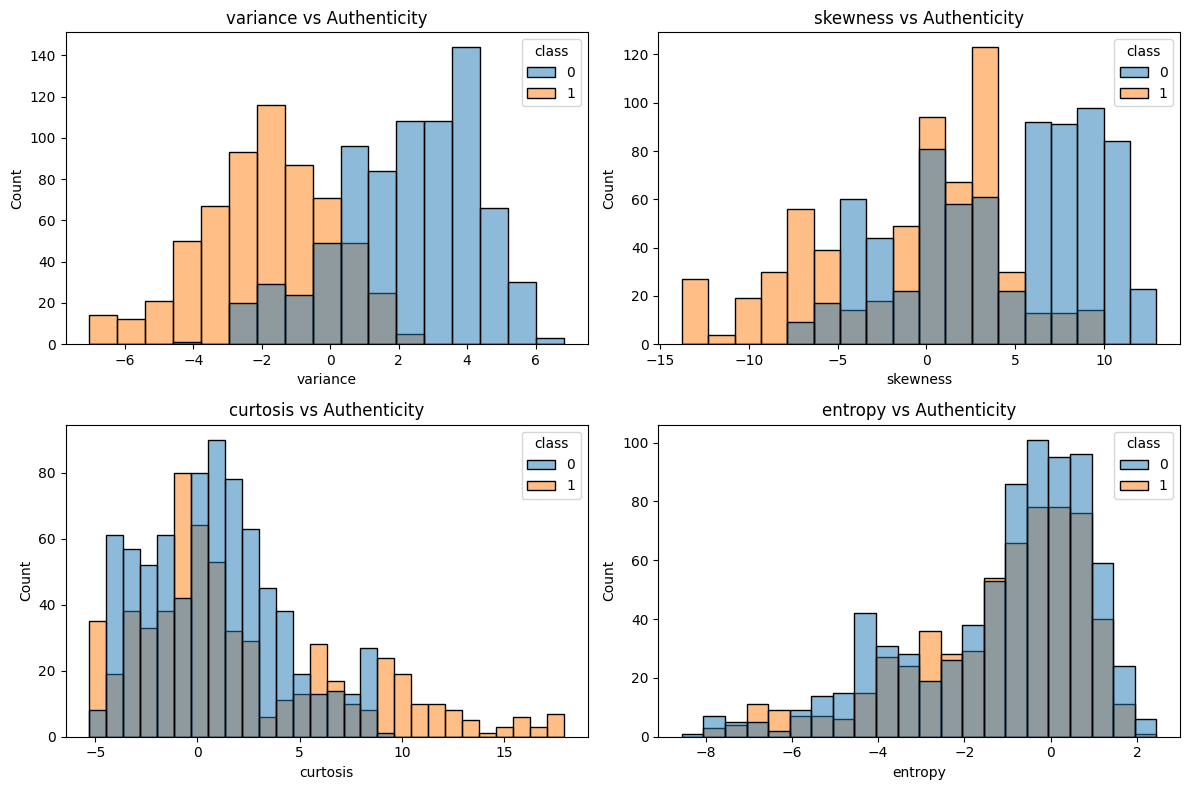

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
for ax, col in zip(axes.flat, df.columns[:-1]):
    sns.histplot(data=df, x=col, hue='class', ax=ax, fill=True)
    ax.set_title(f'{col} vs Authenticity')
plt.tight_layout()


##TODO: Write an inference from the above histogram pairplot in less then 100 words.

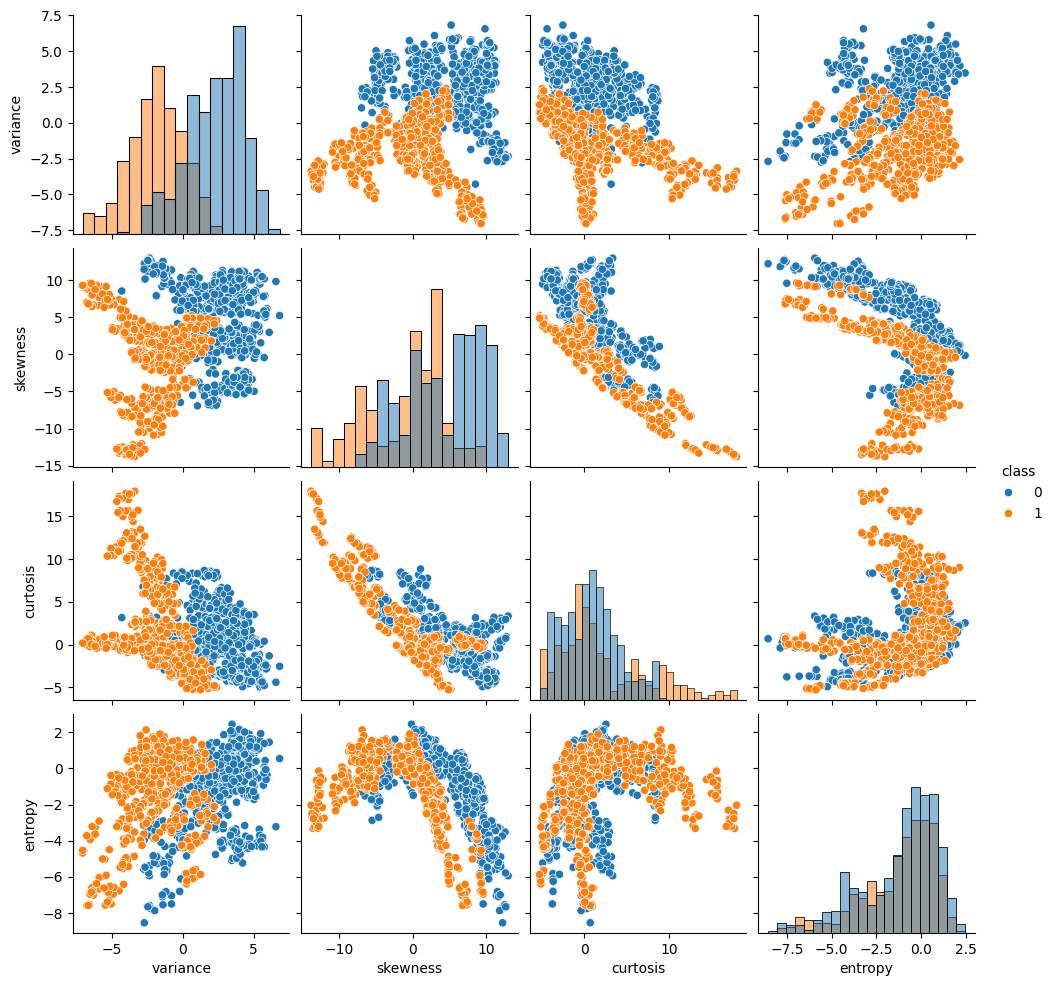

In [ ]:
sns.pairplot(df, hue='class', diag_kind='hist')

##TODO: Write an inference from the above pairplot in less then 100 words.

Text(0.5, 1.0, 'Feature Correlation Matrix')

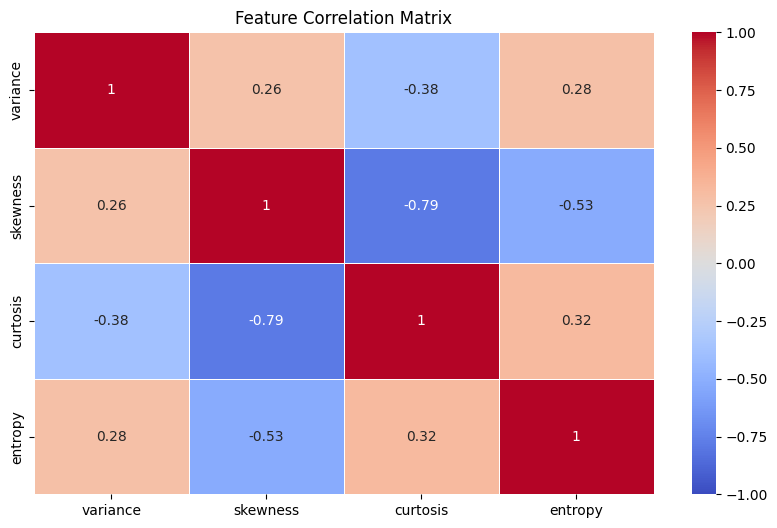

In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = df.drop('class',axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature Correlation Matrix")


##TODO: Write an inference from the above heatmap in less then 100 words.